In [114]:
import pandas as pd
import numpy as np

In [115]:
df=pd.read_csv('C:\\Users\\Shalv Srivastava\\Desktop\\Proj_SST\elnino.csv')


In [116]:
df.dtypes

Observation            int64
 Year                  int64
 Month                 int64
 Day                   int64
 Date                  int64
 Latitude            float64
 Longitude           float64
 Zonal Winds          object
 Meridional Winds     object
 Humidity             object
 Air Temp             object
 Sea Surface Temp     object
dtype: object

In [117]:
df.dropna(inplace=True)

In [118]:
print(df.isnull().sum())

Observation          0
 Year                0
 Month               0
 Day                 0
 Date                0
 Latitude            0
 Longitude           0
 Zonal Winds         0
 Meridional Winds    0
 Humidity            0
 Air Temp            0
 Sea Surface Temp    0
dtype: int64


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Observation        178080 non-null  int64  
 1    Year              178080 non-null  int64  
 2    Month             178080 non-null  int64  
 3    Day               178080 non-null  int64  
 4    Date              178080 non-null  int64  
 5    Latitude          178080 non-null  float64
 6    Longitude         178080 non-null  float64
 7    Zonal Winds       178080 non-null  object 
 8    Meridional Winds  178080 non-null  object 
 9    Humidity          178080 non-null  object 
 10   Air Temp          178080 non-null  object 
 11   Sea Surface Temp  178080 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


In [120]:
df.describe()

,Observation,Year,Month,Day,Date,Latitude,Longitude
count,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000
mean,89040.500000,93.302325,6.504869,15.720536,933689.455374,0.473626,-54.025233
std,51407.412306,3.393818,3.459657,8.800487,33900.474320,4.583041,135.363994
min,1.000000,80.000000,1.000000,1.000000,800307.000000,-8.810000,-180.000000
25%,44520.750000,92.000000,4.000000,8.000000,920116.000000,-2.010000,-154.950000
50%,89040.500000,94.000000,6.000000,16.000000,940601.000000,0.010000,-111.260000
75%,133560.250000,96.000000,10.000000,23.000000,960617.000000,4.980000,147.010000
max,178080.000000,98.000000,12.000000,31.000000,980623.000000,9.050000,171.080000


In [121]:
df.columns

Index(['Observation', ' Year', ' Month', ' Day', ' Date', ' Latitude',
       ' Longitude', ' Zonal Winds', ' Meridional Winds', ' Humidity',
       ' Air Temp', ' Sea Surface Temp'],
      dtype='object')

In [122]:
df.head()

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19


In [123]:
df.dtypes

Observation            int64
 Year                  int64
 Month                 int64
 Day                   int64
 Date                  int64
 Latitude            float64
 Longitude           float64
 Zonal Winds          object
 Meridional Winds     object
 Humidity             object
 Air Temp             object
 Sea Surface Temp     object
dtype: object

In [124]:
names = list(df.columns)
for i in range(0,12):
    names[i] = names[i].lstrip()
df.columns = names


In [125]:
df['Zonal Winds'] = pd.to_numeric(df['Zonal Winds'], errors='coerce')
df['Meridional Winds'] = pd.to_numeric(df['Meridional Winds'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
df['Air Temp'] = pd.to_numeric(df['Air Temp'], errors='coerce')
df['Sea Surface Temp'] = pd.to_numeric(df['Sea Surface Temp'], errors='coerce')


In [126]:
nan_counts = df[['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp']].isnull().sum()
print(nan_counts)


Zonal Winds         25163
Meridional Winds    25162
Humidity            65761
Air Temp            18237
Sea Surface Temp    17007
dtype: int64


In [127]:
df.shape

(178080, 12)

In [128]:
columns_to_check = ['Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp', 'Sea Surface Temp']
df.dropna(subset=columns_to_check, inplace=True)


In [129]:
df.shape

(93935, 12)

In [130]:
########################
########################

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns


In [133]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [134]:
selected_features = ['Air Temp', 'Longitude', 'Zonal Winds', 'Humidity', 'Meridional Winds']

selected_features.append('Sea Surface Temp')


selected_data = df[selected_features]

In [135]:
from sklearn.model_selection import train_test_split
X = selected_data.drop(columns=['Sea Surface Temp'])
y = selected_data['Sea Surface Temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Sample data (replace this with your actual data)
data = {
    'Zonal Winds': np.random.uniform(low=-10, high=10, size=100),
    'Meridional Winds': np.random.uniform(low=-10, high=10, size=100),
    'Sea Surface Temp': np.random.uniform(low=20, high=30, size=100),
    'Air Temp': np.random.uniform(low=10, high=25, size=100),
    'Humidity': np.random.uniform(low=0, high=100, size=100)
}
df = pd.DataFrame(data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the scatter plot
scatter = ax.scatter(df['Zonal Winds'], df['Meridional Winds'], df['Sea Surface Temp'],
                     c=df['Air Temp'], s=df['Humidity'], cmap='coolwarm', alpha=0.6)

# Setting labels
ax.set_xlabel('Zonal Winds')
ax.set_ylabel('Meridional Winds')
ax.set_zlabel('Sea Surface Temp')
ax.set_title('Complex 3D Scatter Plot')

# Adding colorbar for Air Temp
cbar = plt.colorbar(scatter)
cbar.set_label('Air Temp')

# Adding legend for Humidity (using marker size)
sizes = [10, 50, 100]  # Assuming these represent different levels of humidity
legend_labels = ['Low Humidity', 'Medium Humidity', 'High Humidity']
legend_markers = [plt.scatter([], [], s=size, label=label, alpha=0.6) for size, label in zip(sizes, legend_labels)]
plt.legend(handles=legend_markers, title='Humidity')

plt.show()


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'Zonal Winds': np.random.uniform(low=-10, high=10, size=100),
    'Meridional Winds': np.random.uniform(low=-10, high=10, size=100),
    'Sea Surface Temp': np.random.uniform(low=20, high=30, size=100),
    'Air Temp': np.random.uniform(low=10, high=25, size=100),
    'Humidity': np.random.uniform(low=0, high=100, size=100)
}
df = pd.DataFrame(data)

# Creating a pairplot
sns.set(style="ticks")
pair_plot = sns.pairplot(df, diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.5})

# Adjust layout
plt.subplots_adjust(top=0.95)
pair_plot.fig.suptitle('Complex Pairplot of Variables')

plt.show()


In [136]:
df.dtypes

Observation           int64
Year                  int64
Month                 int64
Day                   int64
Date                  int64
Latitude            float64
Longitude           float64
Zonal Winds         float64
Meridional Winds    float64
Humidity            float64
Air Temp            float64
Sea Surface Temp    float64
dtype: object

In [137]:
unique_pairs = df[['Latitude', 'Longitude']].drop_duplicates()

In [138]:
for index, row in unique_pairs.iterrows():
    print(f"lat = {row['Latitude']}, long = {row['Longitude']}")

lat = -0.02, long = -109.96
lat = -0.02, long = -109.97
lat = -0.03, long = -109.96
lat = -0.01, long = -109.97
lat = -0.03, long = -109.97
lat = -0.02, long = -109.98
lat = -0.01, long = -109.98
lat = -0.02, long = -109.99
lat = -0.03, long = -109.99
lat = -0.01, long = -109.99
lat = 0.0, long = -109.98
lat = 0.0, long = -109.99
lat = -0.02, long = -110.0
lat = -0.01, long = -110.0
lat = 0.0, long = -110.0
lat = -0.03, long = -109.95
lat = -0.02, long = -110.02
lat = -0.03, long = -110.02
lat = -0.04, long = -110.03
lat = -0.03, long = -110.04
lat = -0.04, long = -110.04
lat = -0.02, long = -110.03
lat = -0.02, long = -110.04
lat = -0.03, long = -110.03
lat = -0.01, long = -110.03
lat = 0.02, long = -110.02
lat = 0.02, long = -110.03
lat = 0.01, long = -110.03
lat = 0.01, long = -110.02
lat = 0.03, long = -110.02
lat = 0.03, long = -110.03
lat = 0.01, long = -110.04
lat = 0.02, long = -110.01
lat = 0.0, long = -110.03
lat = 0.01, long = -110.0
lat = 0.02, long = -110.0
lat = 0.02, lon

In [88]:
df.columns

Index(['Sea Surface Temp', 'Latitude', 'Longitude', 'Year', 'Month', 'Day'], dtype='object')

In [139]:
df = df[(df != 0).all(axis=1)]

In [142]:
df.head(20
       )

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
4059,4060,93,5,9,930509,-0.02,-109.96,-2.1,2.1,81.2,26.80,27.02
4060,4061,93,5,10,930510,-0.02,-109.96,-3.4,1.4,84.2,26.95,26.91
4061,4062,93,5,11,930511,-0.02,-109.96,-3.8,2.2,84.9,26.98,26.78
4062,4063,93,5,12,930512,-0.02,-109.96,-3.0,1.5,86.9,26.93,26.74
4063,4064,93,5,13,930513,-0.02,-109.96,-4.5,1.9,87.6,27.01,26.82
4064,4065,93,5,14,930514,-0.02,-109.96,-5.0,1.3,85.6,26.96,26.68
4065,4066,93,5,15,930515,-0.02,-109.96,-4.5,0.3,83.4,26.89,26.82
4067,4068,93,5,17,930517,-0.02,-109.97,-0.8,4.3,85.1,27.01,27.33
4068,4069,93,5,18,930518,-0.02,-109.96,-2.0,5.8,85.7,27.19,27.13
4069,4070,93,5,19,930519,-0.02,-109.96,-2.9,4.4,83.0,27.15,26.99


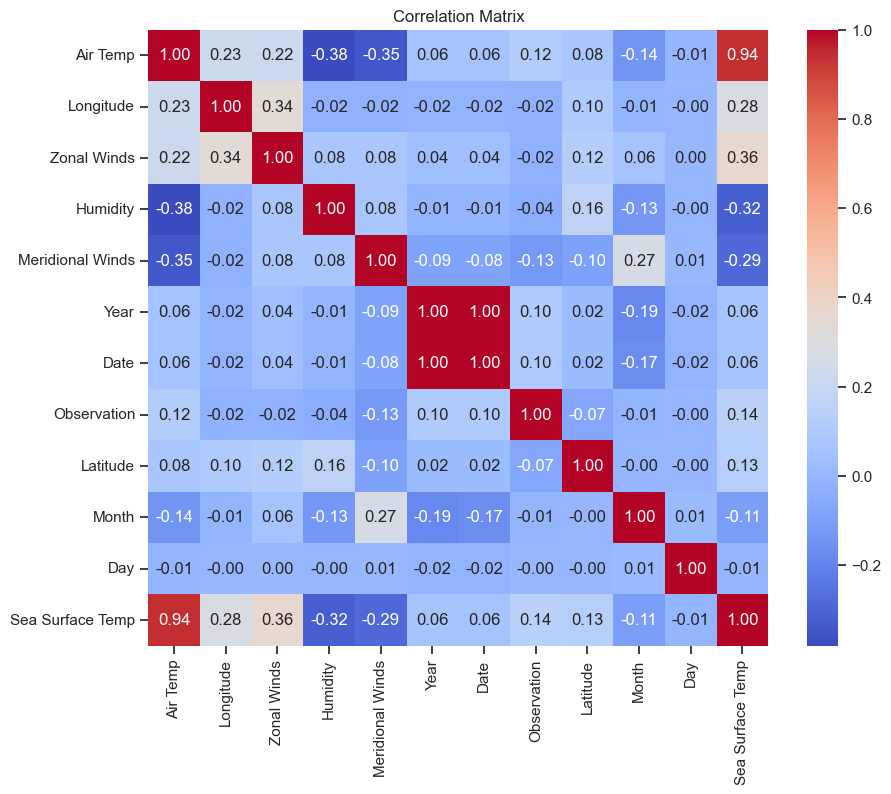

In [143]:
features = ['Air Temp', 'Longitude', 'Zonal Winds', 'Humidity', 'Meridional Winds', 'Year', 'Date', 'Observation', 'Latitude', 'Month', 'Day']
target = 'Sea Surface Temp'


data = df[features + [target]]

correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [144]:
sea_surface_temp_corr = correlation_matrix[target].drop(target)  # Dropping the target column itself

sorted_corr = sea_surface_temp_corr.abs().sort_values(ascending=False)


print("Correlation Scores impacting 'Sea Surface Temperature':")
for feature, corr_score in sorted_corr.items():
    print(f"{feature}: {corr_score:.4f}")

Correlation Scores impacting 'Sea Surface Temperature':
Air Temp: 0.9407
Zonal Winds: 0.3624
Humidity: 0.3167
Meridional Winds: 0.2923
Longitude: 0.2782
Observation: 0.1391
Latitude: 0.1295
Month: 0.1054
Year: 0.0618
Date: 0.0601
Day: 0.0051


In [146]:
df.columns

print(df.dtypes)

Observation           int64
Year                  int64
Month                 int64
Day                   int64
Date                  int64
Latitude            float64
Longitude           float64
Zonal Winds         float64
Meridional Winds    float64
Humidity            float64
Air Temp            float64
Sea Surface Temp    float64
dtype: object


In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [149]:
features = ['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'Zonal Winds', 'Meridional Winds', 'Humidity', 'Air Temp']
target = 'Sea Surface Temp'

In [150]:
data = df[features + [target]]

In [151]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [152]:
sequence_length = 10 
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:(i + sequence_length), :-1])
    y.append(scaled_data[i + sequence_length, -1])

X, y = np.array(X), np.array(y)

In [153]:
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [154]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [155]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/50
2216/2216 [==============================] - 29s 11ms/step - loss: 0.0145 - val_loss: 0.0132
Epoch 2/50
2216/2216 [==============================] - 24s 11ms/step - loss: 0.0089 - val_loss: 0.0122
Epoch 3/50
2216/2216 [==============================] - 24s 11ms/step - loss: 0.0056 - val_loss: 0.0114
Epoch 4/50
2216/2216 [==============================] - 24s 11ms/step - loss: 0.0041 - val_loss: 0.0103
Epoch 5/50
2216/2216 [==============================] - 25s 12ms/step - loss: 0.0034 - val_loss: 0.0079
Epoch 6/50
2216/2216 [==============================] - 25s 11ms/step - loss: 0.0030 - val_loss: 0.0064
Epoch 7/50
2216/2216 [==============================] - 24s 11ms/step - loss: 0.0027 - val_loss: 0.0048
Epoch 8/50
2216/2216 [==============================] - 24s 11ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 9/50
2216/2216 [==============================] - 24s 11ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 10/50
2216/2216 [==============================] - 24s 11m

In [157]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions), axis=1))[:, -1]

554/554 [==============================] - 2s 3ms/step


ValueError: operands could not be broadcast together with shapes (17716,9) (10,) (17716,9) 